In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '../source/')
from plot_utils import *
from datasets import *

In [2]:
snIa = pd.read_pickle("../data/training/raw/lcs_Ia_salt2_000000.pkl")
snIbc = pd.read_pickle("../data/training/raw/lcs_Ibc_nugent_000000.pkl")
snIIn = pd.read_pickle("../data/training/raw/lcs_IIn_nugent_000000.pkl")
snIIP = pd.read_pickle("../data/training/raw/lcs_IIP_nugent_000000.pkl")
snIa_lcs = snIa["lcs"]
snIbc_lcs = snIbc["lcs"]
snIIn_lcs = snIIn["lcs"]
snIIP_lcs = snIIP["lcs"]

#sample 4 objects from simulated ztf raw light curves, one from each class
snIa_rand = np.random.randint(0,len(snIa_lcs))
snIbc_rand =np.random.randint(0,len(snIbc_lcs))
snIIn_rand =np.random.randint(0,len(snIIn_lcs))
snIIP_rand =np.random.randint(0,len(snIIP_lcs))

random_snIa = snIa_lcs[snIa_rand]
random_snIbc = snIbc_lcs[snIbc_rand]
random_snIIn = snIIn_lcs[snIIn_rand]
random_snIIP = snIIP_lcs[snIIP_rand]


In [6]:
interpolated_lcs =  Interpolated_LCs(128, "../data/training/linearly_interpolated/sn_000000.h5")

(30324, 4, 128)
(30324,)
(30324,)


In [7]:
#sample same lightcurves, only the 128 point linearly interpolated version

random_interpolated_snIa= interpolated_lcs[snIa_rand][0]
cum_id = snIa_rand+snIbc_rand
random_interpolated_snIbc= interpolated_lcs[cum_id][0]
cum_id += snIIn_rand
random_interpolated_snIIn= interpolated_lcs[cum_id][0]
cum_id += snIIP_rand
random_interpolated_snIIP= interpolated_lcs[cum_id][0]
print(random_interpolated_snIIP.shape)


torch.Size([4, 128])


In [8]:
raw_lcs = [random_snIa, random_snIbc, random_snIIn, random_snIIP]
int_lcs = [random_interpolated_snIa, random_interpolated_snIbc, random_interpolated_snIIn, random_interpolated_snIIP]

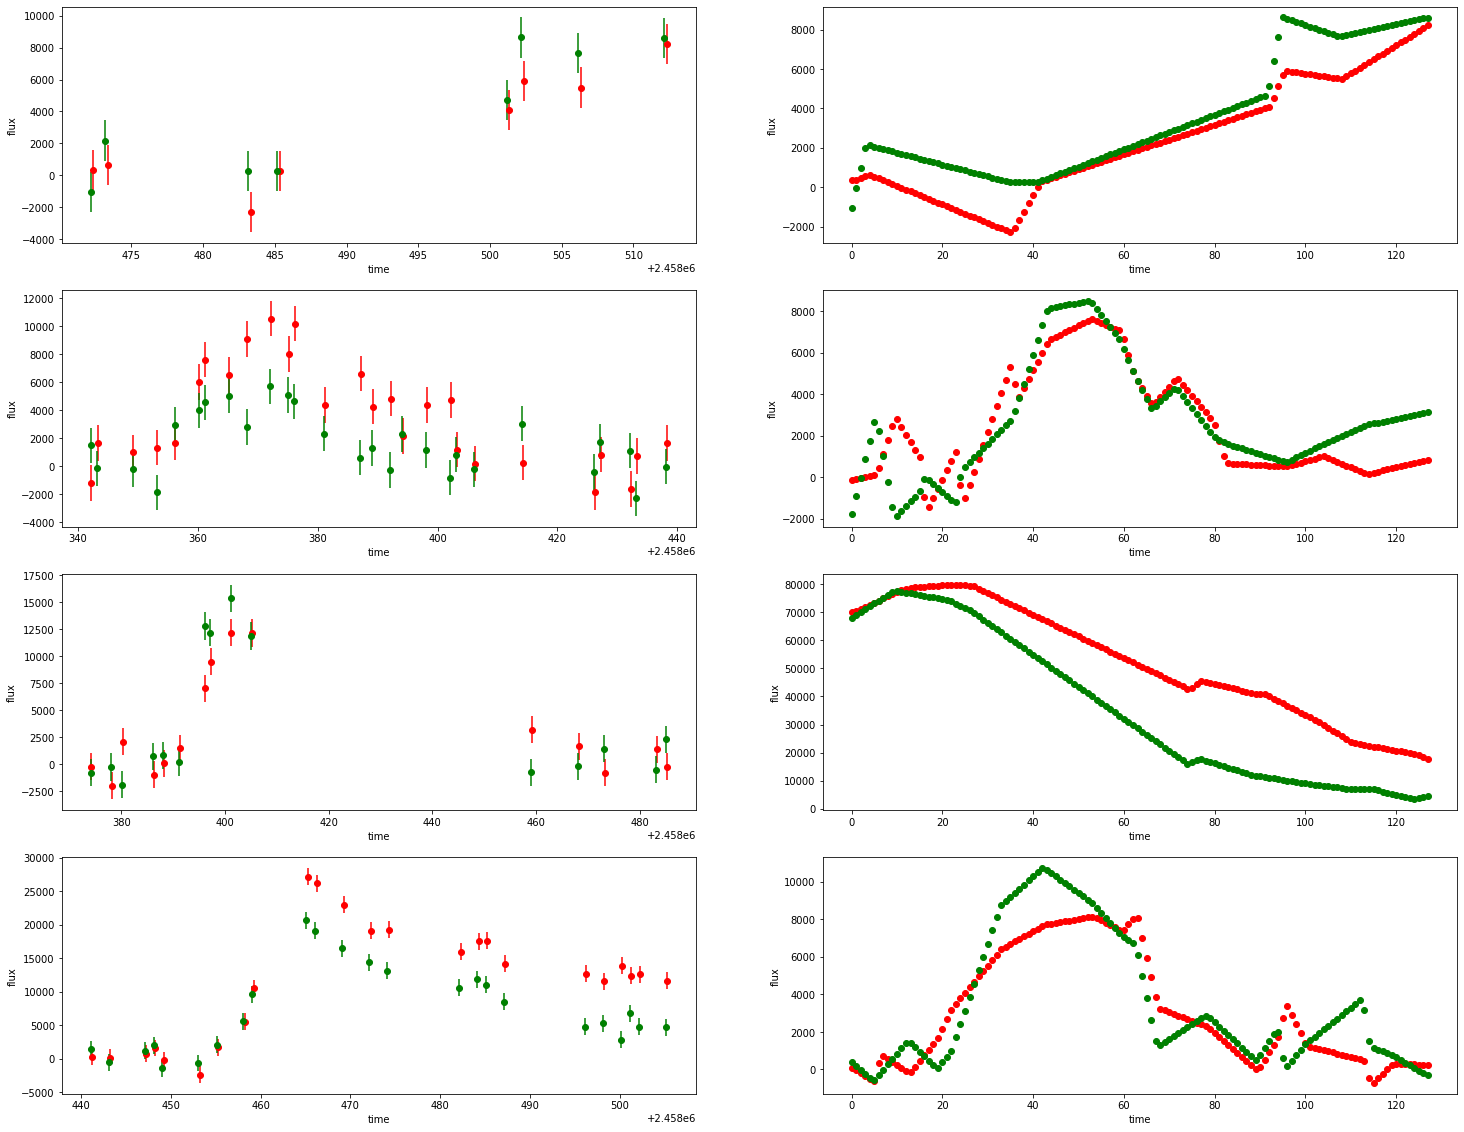

In [9]:
#plot them against each other for sanity check
plot_raw_and_interpolated_lcs(raw_lcs,int_lcs)